# Analisis Exploratorio

In [9]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [10]:
path = '../data/events.csv'
eventos_2018 = pd.read_csv(path)

/home/bauticavanese/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analisis Previo

In [11]:
#Veo la forma
eventos_2018.shape

(1011288, 23)

In [12]:
#Información sobre el data frame 
eventos_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [13]:
# Damos formato a la fecha.
eventos_2018['timestamp_format'] = pd.to_datetime(eventos_2018['timestamp'])

# Agrego columna fecha
eventos_2018['date'] = eventos_2018['timestamp_format'].dt.date
# Agrego columna para los meses.
eventos_2018['month'] =eventos_2018['timestamp_format'].dt.month
# Agrego columna dias
eventos_2018['day'] = eventos_2018['timestamp_format'].dt.weekday_name
# Agrego columna de horas
eventos_2018['hour'] = eventos_2018['timestamp_format'].dt.hour


In [14]:
# Evento como categoria
eventos_2018['event_category'] = eventos_2018['event'].astype('category')

## Info General

In [15]:
# Top personas con mas eventos
top_personas = eventos_2018.groupby('person')['event_category'].count().sort_values(ascending=False)[:10]

Text(0,0.5,'ID Persona')

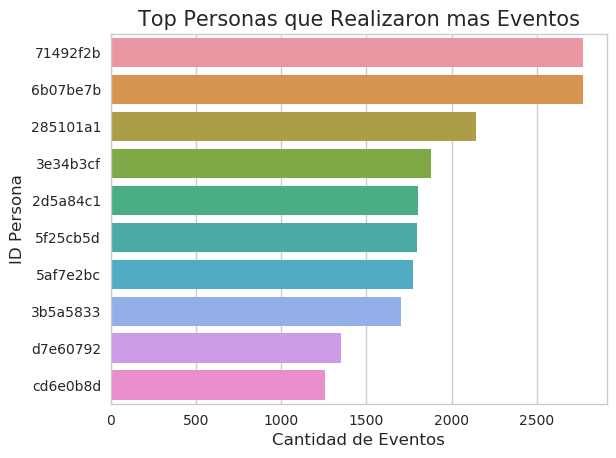

In [16]:
g = sns.barplot(x=top_personas.values, y=top_personas.index, orient='h')
g.set_title("Top Personas que Realizaron mas Eventos", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("ID Persona", fontsize=12)

In [17]:
# Top eventos
top_eventos = eventos_2018.groupby('event_category')['event_category'].count().sort_values(ascending=False)

Text(0,0.5,'Eventos')

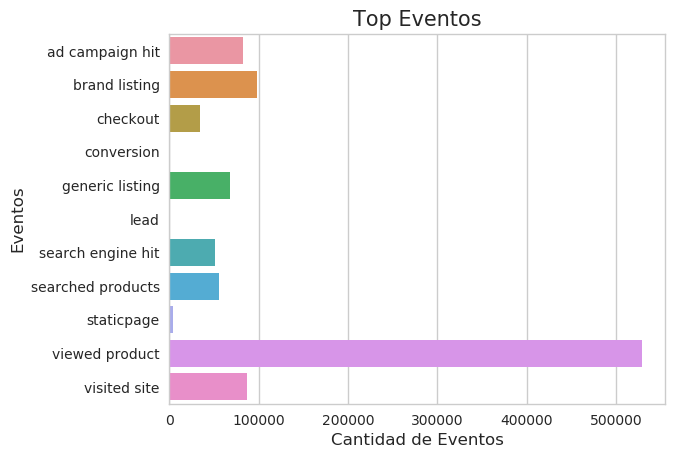

In [18]:
g = sns.barplot(x=top_eventos.values, y=top_eventos.index, orient='h')
g.set_title("Top Eventos", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("Eventos", fontsize=12)

# Analisis Temporal

Primero haremos un primer plot para ver como estan distribuidos los datos, ademas de su frecuencia.

Text(0,0.5,'Cantidad de Eventos')

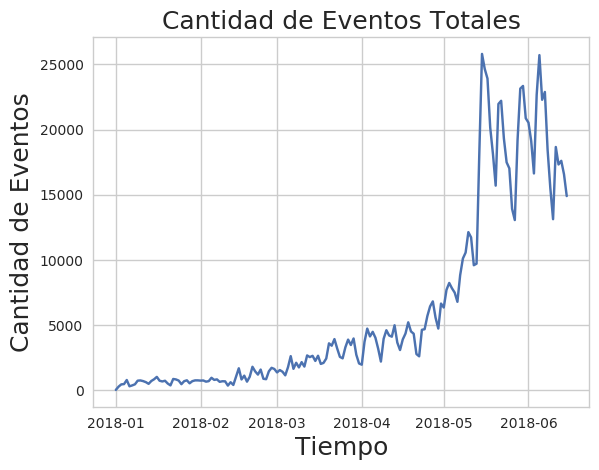

In [19]:
eventos_totales = eventos_2018.groupby('date')['event_category'].count()
g = eventos_totales.plot()
g.set_title("Cantidad de Eventos Totales", fontsize=18)
g.set_xlabel("Tiempo", fontsize=18)
g.set_ylabel("Cantidad de Eventos", fontsize=18)

#g.get_figure().set_size_inches(12, 6)
#g.get_figure().savefig('img/eventos_tiempo.png', dpi=100)

Text(0,0.5,'Cantidad de Eventos')

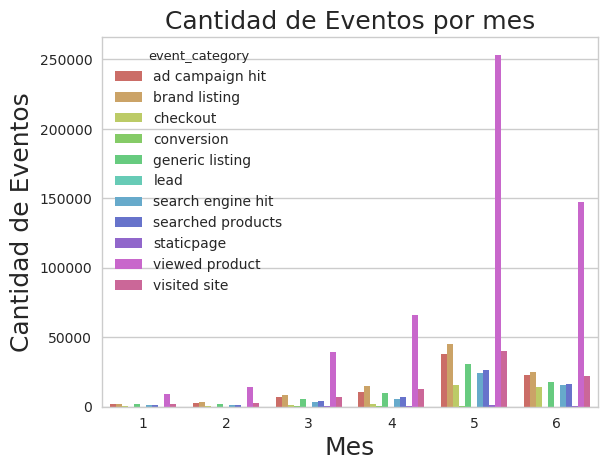

In [20]:
g = sns.countplot(x='month', hue='event_category', data=eventos_2018, palette="hls")
g.set_title("Cantidad de Eventos por mes", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de Eventos", fontsize=18)


#g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('eventos_mes.png')

Como se puede observar, el evento mas frecuente realizado por el usiario es la visita a una pagina de producto. 
En general la propocion entre los mismos es muy similar para los meses analizados.

In [21]:
prod_sin_stock = eventos_2018.loc[eventos_2018['event_category'] == 'lead'].groupby('model')['event_category'].count().sort_values(ascending=False)[:10]
prod_sin_stock
#productos_sin_stock = eventos_2018.loc[eventos_2018['event'] == 'lead'].groupby(['model', 'date']).agg({'event' : 'count'})
#productos_sin_stock.reset_index(inplace=True)

model
iPhone 6 Plus                 35
iPhone 6S Plus                31
Samsung Galaxy J7 Prime       26
iPhone 6S                     21
Motorola Moto G4 Plus         20
iPhone 8                      20
Samsung Galaxy A9 Pro 2016    15
Samsung Galaxy On 7           15
Motorola Moto G5 Plus         15
iPhone 6                      12
Name: event_category, dtype: int64

/home/bauticavanese/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


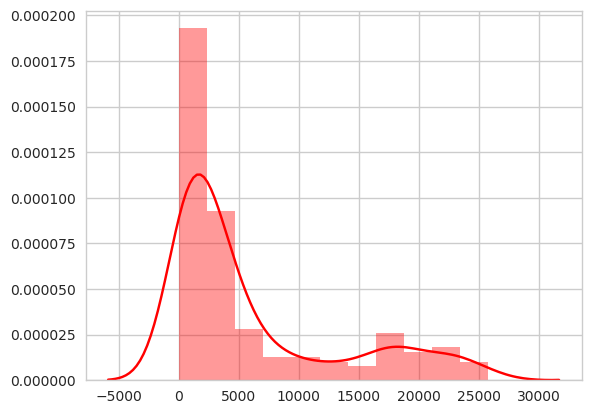

In [22]:
g = sns.distplot(eventos_totales.values, color='r')


In [23]:
eventos_2018['event_conversion'] = eventos_2018['event_category'] == 'conversion'
group = eventos_2018.groupby('date')['event_conversion'].sum()

type(eventos_totales)


pandas.core.series.Series

In [24]:
eventos_2018['event_c'] = 1
for_heatmap = eventos_2018.pivot_table(index='day', columns='month', values='event_c', aggfunc='sum')

In [25]:
for_heatmap

month,1,2,3,4,5,6
day,,,,,,
Friday,2843,3871,11894,20171,56727,53865
Monday,2904,4072,10176,22858,68064,41311
Saturday,2091,3357,10227,15203,49128,34606
Sunday,2007,2581,7520,14598,45251,29752
Thursday,2331,4289,13638,19548,82617,39445
Tuesday,3640,4736,12653,18378,87590,43023
Wednesday,3454,4980,11185,19252,85572,39880


Text(50.7222,0.5,'Dia')

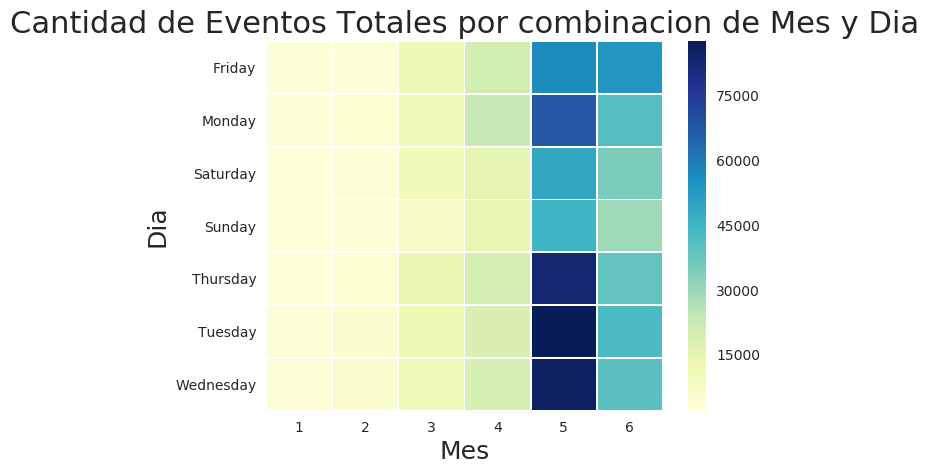

In [26]:
g =  sns.heatmap(for_heatmap , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Eventos Totales por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

In [27]:
eventos_2018.groupby('browser_version')['browser_version'].count().sort_values(ascending=False)[:10]

browser_version
Chrome 66.0           22611
Chrome Mobile 66.0    17513
Chrome 65.0            6635
Chrome Mobile 65.0     5665
Chrome Mobile 64.0     3083
Chrome 67.0            3073
Chrome Mobile 67.0     2683
Chrome 64.0            2450
Mobile Safari 11       2071
Chrome Mobile 39       1639
Name: browser_version, dtype: int64

In [28]:
for_heatmap_hr_day = eventos_2018.pivot_table(index='hour', columns='day', values='event_c', aggfunc='sum')

Text(50.7222,0.5,'Hora')

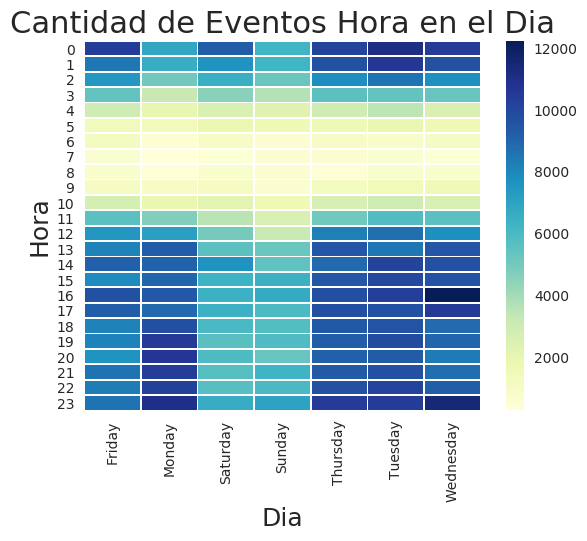

In [29]:
g =  sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Eventos Hora en el Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)

#g.get_figure().savefig('img/eventos_dia.png')

# Dispositivos mas relevantes

In [30]:
# Nueva columna con la marca del dispositivo
eventos_2018['trademark'] = eventos_2018['model'].str.split(n=1).str[0]

In [31]:
# Obtengo las marcas mas ocurrentes.
marcas_ordenadas = eventos_2018['trademark'].value_counts().index

In [32]:
model_conversion = pd.DataFrame(eventos_2018.groupby(['trademark', 'month'])['trademark'].agg('count'))
model_conversion.columns = ['count']
model_conversion.reset_index(inplace=True)

In [33]:
# Pivot table, cantidad de ocurrencias por mes.
pivoted = pd.pivot_table(model_conversion,values='count',columns='trademark', \
                         index='month', fill_value=0)
pivoted

trademark,Asus,Blackberry,LG,Lenovo,Motorola,Quantum,Samsung,Sony,iPad,iPhone
month,,,,,,,,,,
1,259,0,145,35,915,5,3053,99,60,4706
2,297,0,232,93,1002,31,3687,93,81,9151
3,471,0,815,352,4317,24,15163,634,140,19470
4,485,0,1116,388,6548,10,29065,1002,269,29478
5,224,1,4802,2373,34052,232,102432,3104,999,121176
6,355,0,2614,1538,16684,218,64727,2093,365,72604


In [34]:
# "Normalizo".
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)
# Reeorganizo las columnas.
pivoted = pivoted.reindex(marcas_ordenadas[::-1], axis=1)

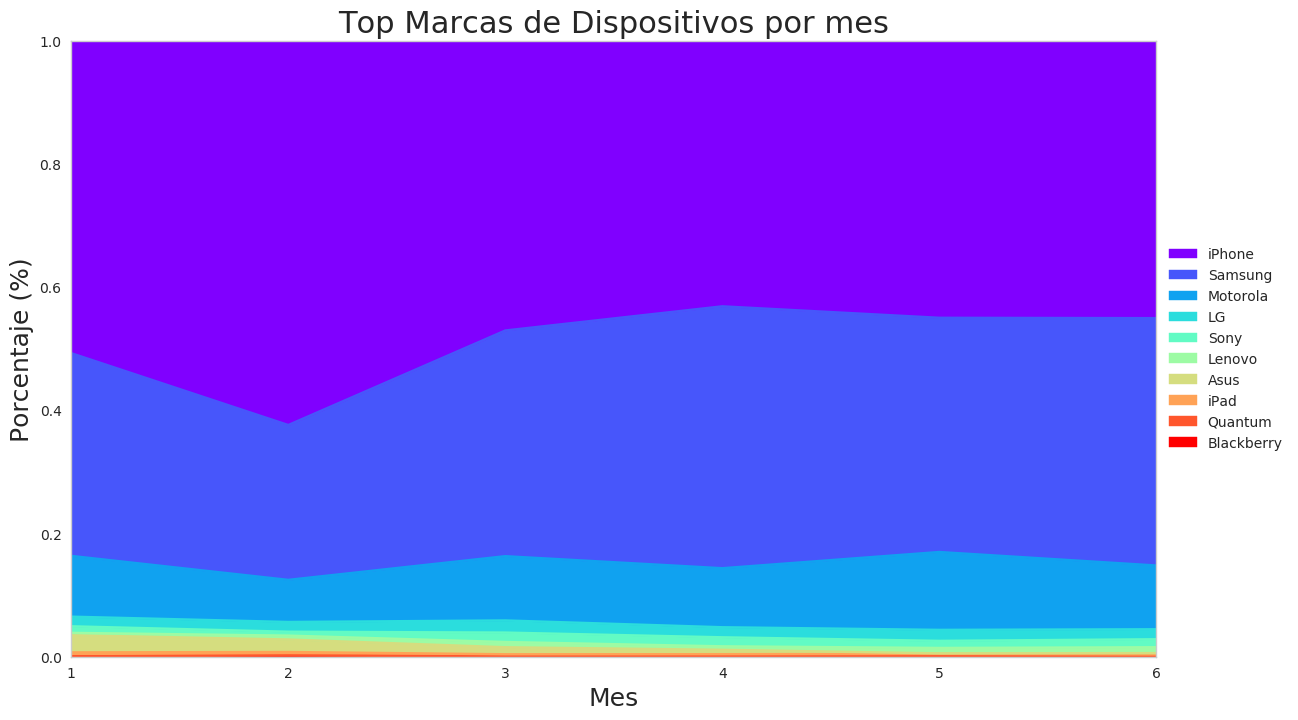

In [35]:
# Plot 
f = plt.figure()
plt.title('Top Marcas de Dispositivos por mes', fontsize=22)
ax = pivoted.plot(kind='area', stacked=True, colormap='rainbow_r', figsize=(14,8), ax=f.gca())
# Config labels y handels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', fontsize=18);
ax.set_xlabel('Mes', fontsize=18);
# Limites grafico
ax.set_ylim(0,1)
ax.set_xlim(1,6)
plt.show()

## Como se comportan los usuarios que interactuan con la plataforma desde distintos dispositivos?


In [36]:
eventos_2018['operating_system'] = eventos_2018['operating_system_version'].str.split(n=1).str[0]

In [38]:
eventos_por_so = eventos_2018.groupby(['operating_system', 'screen_resolution'], as_index=False)['event_category'].count()
#info
eventos_por_so['event_category'].describe()

count      352.000000
mean       248.232955
std       1984.619865
min          1.000000
25%          1.000000
50%          4.000000
75%         17.000000
max      29857.000000
Name: event_category, dtype: float64

In [40]:
# Filtramos por el promedio.
minimo = 500
eventos_por_so = eventos_por_so.loc[eventos_por_so['event_category'] > minimo]

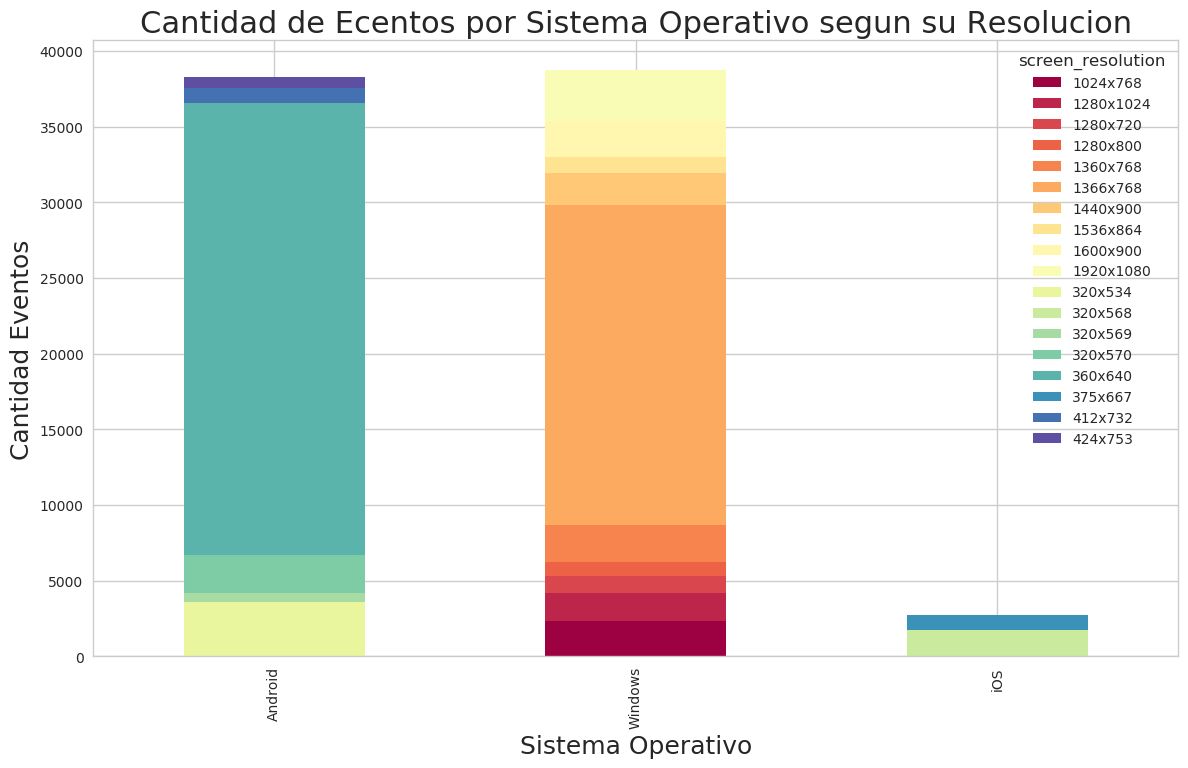

In [41]:
pivoted = pd.pivot_table(eventos_por_so,values='event_category',columns='screen_resolution', \
                         index='operating_system')

f = plt.figure()
plt.title('Cantidad de Ecentos por Sistema Operativo segun su Resolucion', fontsize=22)
ax = pivoted.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(14,8), ax=f.gca())
ax.set_ylabel('Cantidad Eventos', fontsize=18);
ax.set_xlabel('Sistema Operativo', fontsize=18);
plt.show()

Con este plot podemos deducir que tanto windows como android son los sistemas operativos mas activos en la plataforma.
Ademas con la informacion de la resolucion de pantalla podemos concluir:
    * iOS : iPhone 5/SE	320 x 568
    * Android: Predomina 360x640
    * Windows: 1366x768

## Que horarios frecuenta el usuario segun el sistema operativo?

In [ ]:
eventos_so_hora = eventos_2018.groupby(['operating_system', 'hour'], as_index=False)['event'].count()
# Escala logaritmica para visalizar mejor los datos.
eventos_so_hora['event_log'] = np.log(eventos_so_hora['event']+1)
for_heatmap_hr_so = pd.pivot_table(index='hour', columns='operating_system', values='event_log', data=eventos_so_hora)

In [ ]:
g =  sns.heatmap(for_heatmap_hr_so , linewidths=.5, cmap="Greens", annot=True) # annot=True
g.set_title("Cantidad de Eventos por Combinacion Hora y SO (Log)", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora (BRA/ARG)", fontsize=18)

Se puede observar como en dispositivos mobiles/portables como lo son SmartPhones/Tables/etc con un SO (Android/iOS)
obtiene su valor maximo a eso delas 23:00 y se matiene hasta 2:00 aprox, en cambio para dispositivos como computadoras
su pico lo alcanza entre las 17 y 20 hs.